# Data Quality 

The original dataset consists of 50 columns and 5 milions records. The features names were changed according to the table 1. The number of vechicles is 8507, the number of vechicle families is 55. 


In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_context('paper')
%config InlineBackend.figure_format = 'retina'
FILE_PATH = 'C:/Projects/BatteryLevelAnalysis/data/battery_analysis.csv'
df = pd.read_csv(FILE_PATH)

In [2]:
df.head(3)

,Unnamed: 0,id,vin,vin_prefix,recor_id,actual_time,arrival_time,mheader_vin,mheader_time,mheader_type,message,powermode,odometer,ambient_temp,vehicle_speed,recorded_time,balancing_trigger_cell,balancing_status,min_voltage,min_temp,traction_current,max_voltage,imbalance,imbalance_percent,traction_voltage,min_temp_cell,min_voltage_cell,max_voltage_cell,max_temp,max_temp_cell,fuse_temp,emodule_temp,cat4,cat6,cat7,inlet_coolant_temp,cooling_energy_used,thermal_manager_mode,outlet_coolant_temp,max_soh_cell,power_soh,min_soh,soh,max_soh,min_soh_cell_id,fast_charge_count,cycle,num_cycle,fast_charge
0,0,318,0003d9fbded1a6efdacadc35fc270558b3a1cbab0303b2...,SADHA2B1XK,9118129,2019-03-06 10:27:23.000,2019-03-22T04:48:16.839Z,14039059_1553230096091_140_@NGTP,2019-03-22T04:48:16.091Z,HighVoltageBatteryPack,9118129,keyOut,10619,6.5,0.0,605183243,22,noBalancing,4.107,12.0,0.675,4.153,0.046,0.011076,445,15,22,96,14.0,1,870,135,False,False,False,240,0.0,activeHeating,195,1,100.0,96.0,98.0,97.0,7,0,storage,1,False
1,1,319,0003d9fbded1a6efdacadc35fc270558b3a1cbab0303b2...,SADHA2B1XK,1186730,2019-03-07 13:30:10.000,2019-03-07T13:35:10.442Z,14039059_1551965709775_140_@NGTP,2019-03-07T13:35:09.775Z,HighVoltageBatteryPack,1186730,keyOut,9531,4.0,0.0,605280610,22,noBalancing,3.983,6.0,7.375,4.008,0.025,0.006238,432,16,36,21,7.0,1,870,90,False,False,False,50,0.0,idle,55,1,100.0,100.0,98.0,100.0,1,0,storage,1,False
2,2,320,0003d9fbded1a6efdacadc35fc270558b3a1cbab0303b2...,SADHA2B1XK,1186730,2019-03-07 13:30:40.000,2019-03-07T13:35:10.442Z,14039059_1551965709775_140_@NGTP,2019-03-07T13:35:09.775Z,HighVoltageBatteryPack,1186730,keyOut,9531,4.0,0.0,605280640,22,noBalancing,3.989,6.0,7.600,4.023,0.034,0.008451,431,16,36,76,7.0,1,870,90,False,False,False,50,0.0,idle,55,1,100.0,100.0,98.0,100.0,1,0,storage,1,False


In [4]:
df1 = df[['vin', 'powermode', 'odometer', 'ambient_temp', 'balancing_status', 'imbalance', 'traction_current', 'soh', 'cycle']]
df1.head()

,vin,powermode,odometer,ambient_temp,balancing_status,imbalance,traction_current,soh,cycle
0,0003d9fbded1a6efdacadc35fc270558b3a1cbab0303b2...,keyOut,10619,6.5,noBalancing,0.046,0.675,98.0,storage
1,0003d9fbded1a6efdacadc35fc270558b3a1cbab0303b2...,keyOut,9531,4.0,noBalancing,0.025,7.375,98.0,storage
2,0003d9fbded1a6efdacadc35fc270558b3a1cbab0303b2...,keyOut,9531,4.0,noBalancing,0.034,7.600,98.0,storage
3,0003d9fbded1a6efdacadc35fc270558b3a1cbab0303b2...,keyOut,9531,4.0,noBalancing,0.036,6.850,98.0,storage
4,0003d9fbded1a6efdacadc35fc270558b3a1cbab0303b2...,keyOut,9531,4.0,noBalancing,0.035,7.000,98.0,storage


# Missing Values 

In [3]:
print (df.isna().sum(), df.nunique())

Unnamed: 0                  0
id                          0
vin                         0
vin_prefix                  0
recor_id                    0
actual_time                 0
arrival_time                0
mheader_vin                 0
mheader_time                0
mheader_type                0
message                     0
powermode                   0
odometer                    0
ambient_temp                0
vehicle_speed               0
recorded_time               0
balancing_trigger_cell      0
balancing_status            0
min_voltage                 0
min_temp                    0
traction_current            0
max_voltage                 0
imbalance                   0
imbalance_percent         564
traction_voltage            0
min_temp_cell               0
min_voltage_cell            0
max_voltage_cell            0
max_temp                    0
max_temp_cell               0
fuse_temp                   0
emodule_temp                0
cat4                        0
cat6      

'parkingdata_hvbattavgsocoatevent' and 'parkingdata_hvbattavtempatevent' has 99.3% of missing values. 
 
 Message header contains only one message 'HighVoltageBatteryPack'.
 
 fuse_temp and cooling_energy_used has only one value for all records. 

Therefore, these attributes were removed.

# Categorical Features

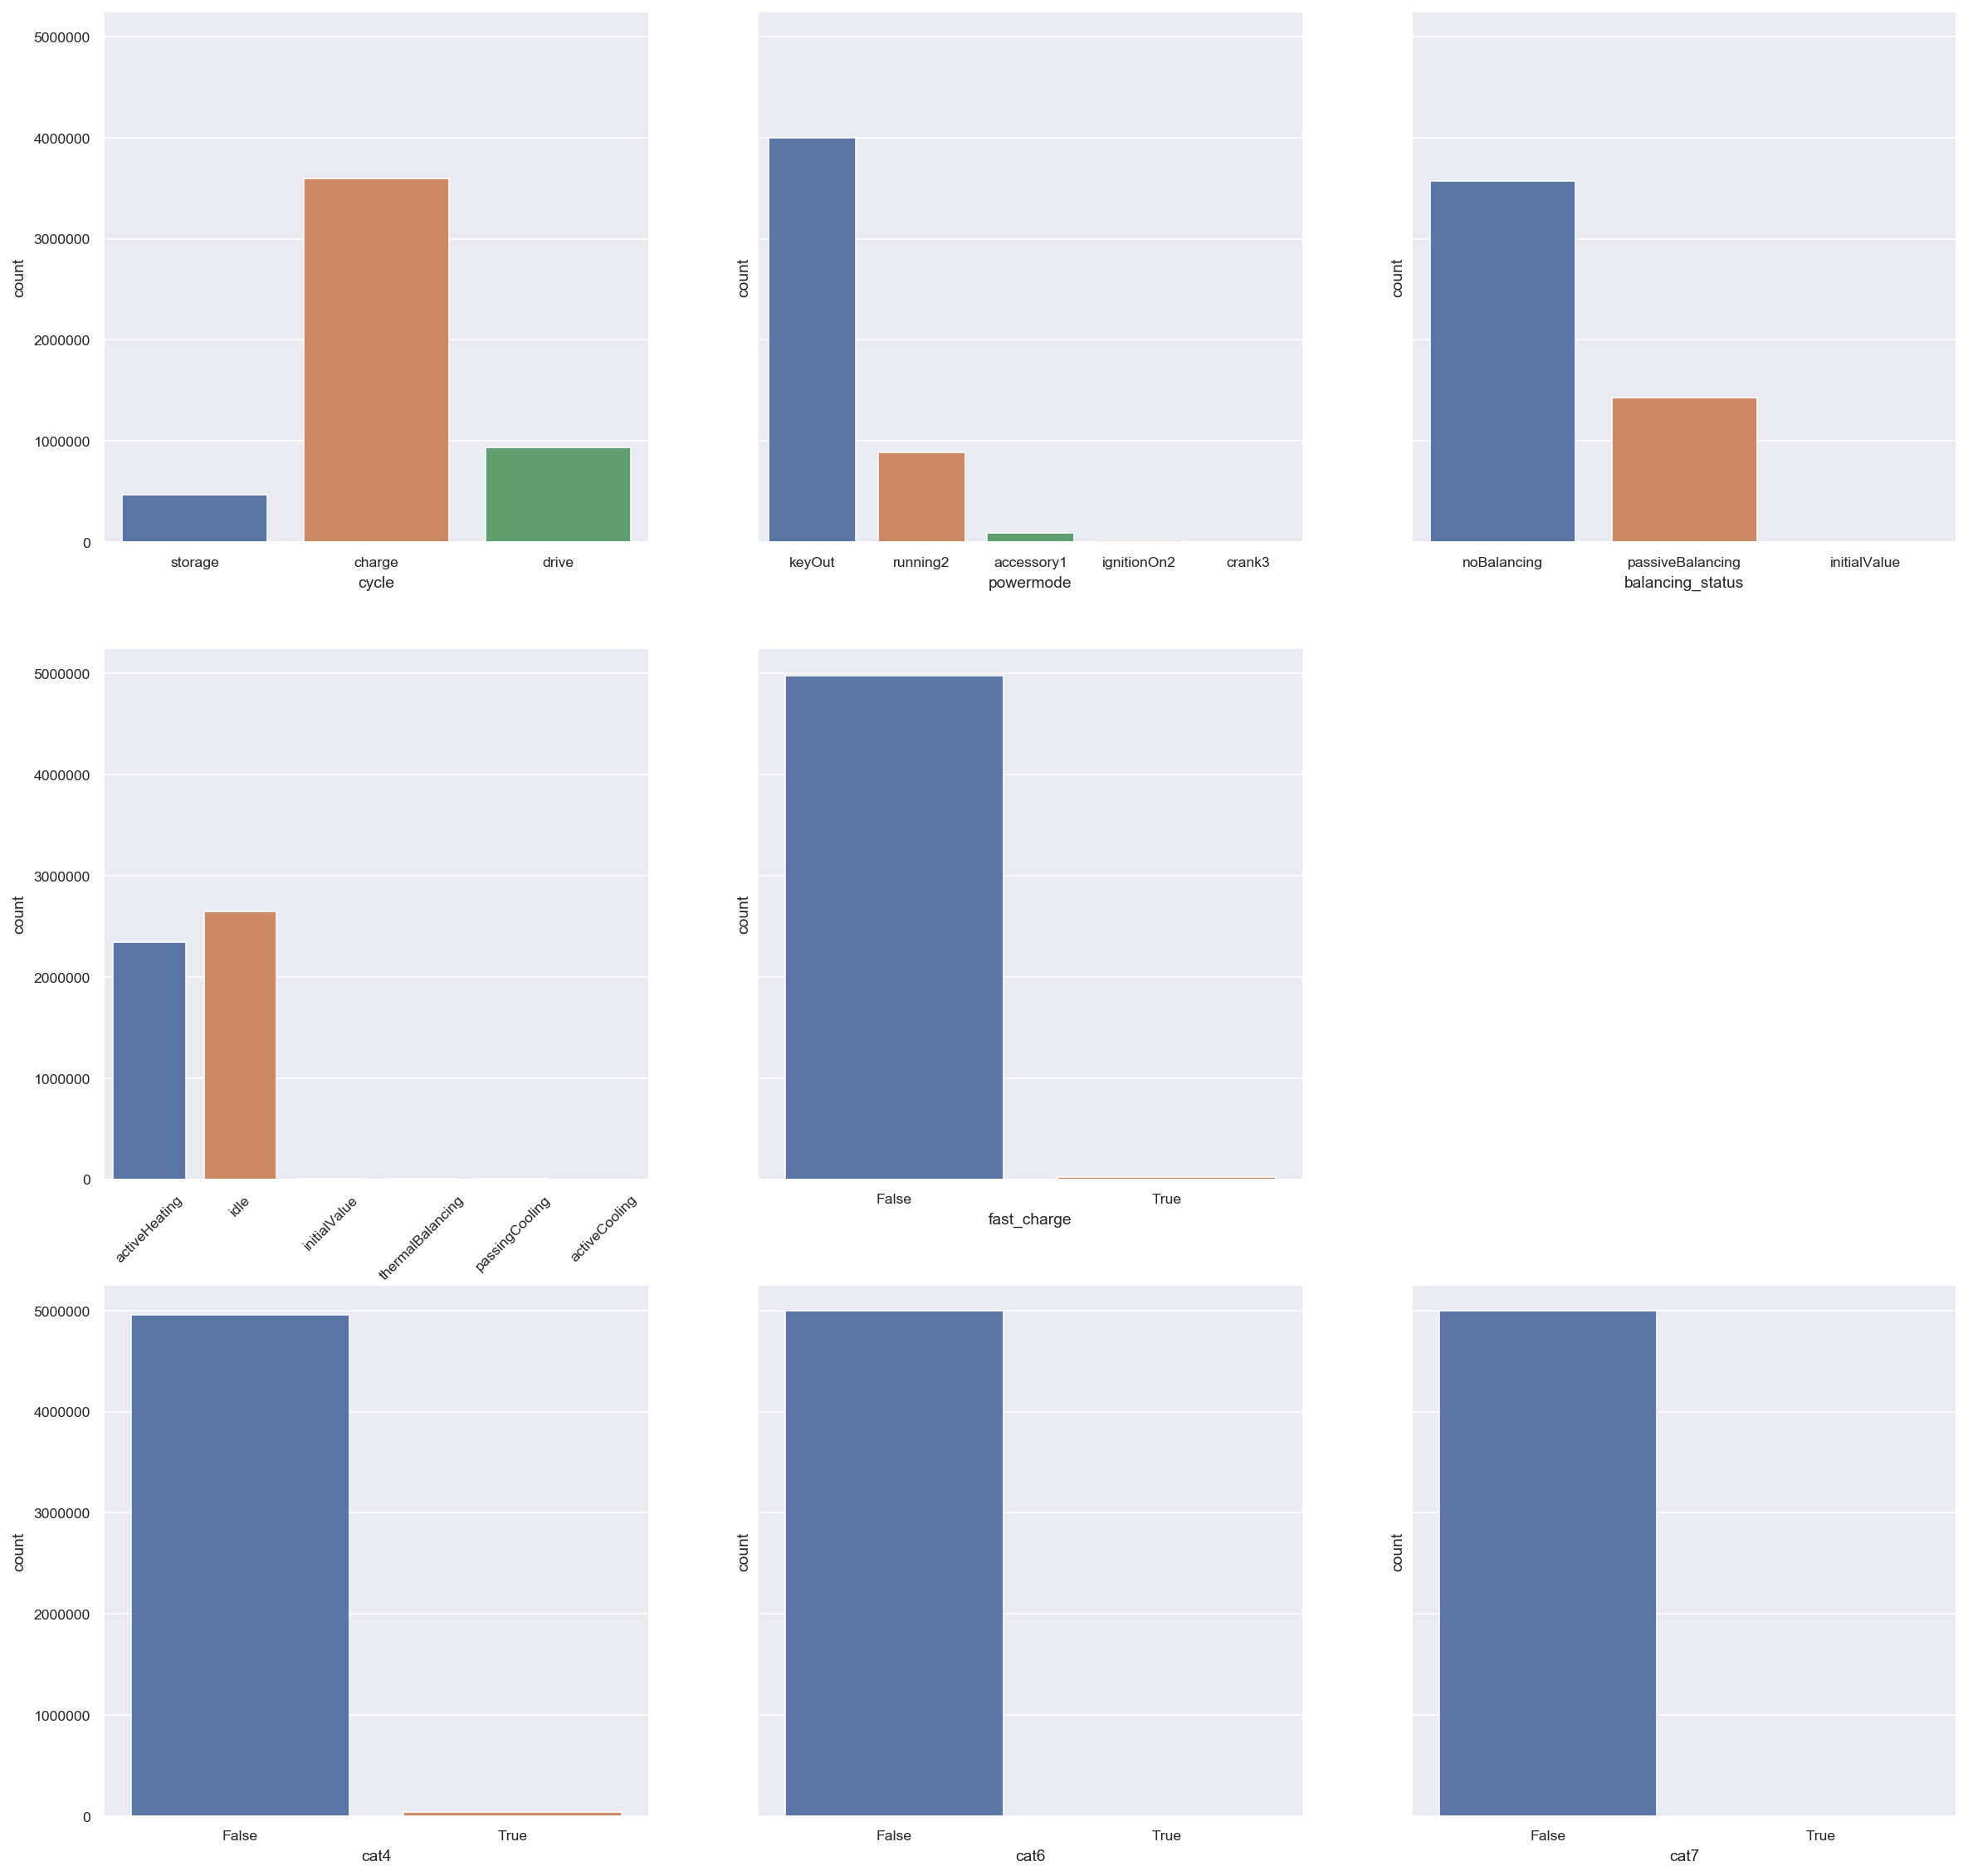

In [7]:
f, axes = plt.subplots(3, 3, figsize=(20,20), sharey=True)
sns.countplot(x = df['cycle'], ax = axes[0,0])
sns.countplot(x = df['powermode'], ax = axes[0,1])
sns.countplot(x = df['balancing_status'], ax = axes[0,2])
sns.countplot(x = df['thermal_manager_mode'], ax = axes[1,0]).tick_params(axis ='x', labelrotation=45)
sns.countplot(x = df['fast_charge'], ax = axes[1,1])
sns.countplot(x = df['cat4'], ax = axes[2,0])
sns.countplot(x = df['cat6'], ax = axes[2,1])
sns.countplot(x = df['cat7'], ax = axes[2,2])
f.delaxes(axes[1,2])
plt.show()

All features have uneven distribution. Some values apear in less than 1% of the records. Fast_charge feature has more than 99% of False values, therefore it does not influence on the result. 

Features above have number of True values less then 1 percent. However, the quantitative equivalentseems big enough to leave these features. 

# Numerical features

To estimate the correlation among features the heatmap was built. 

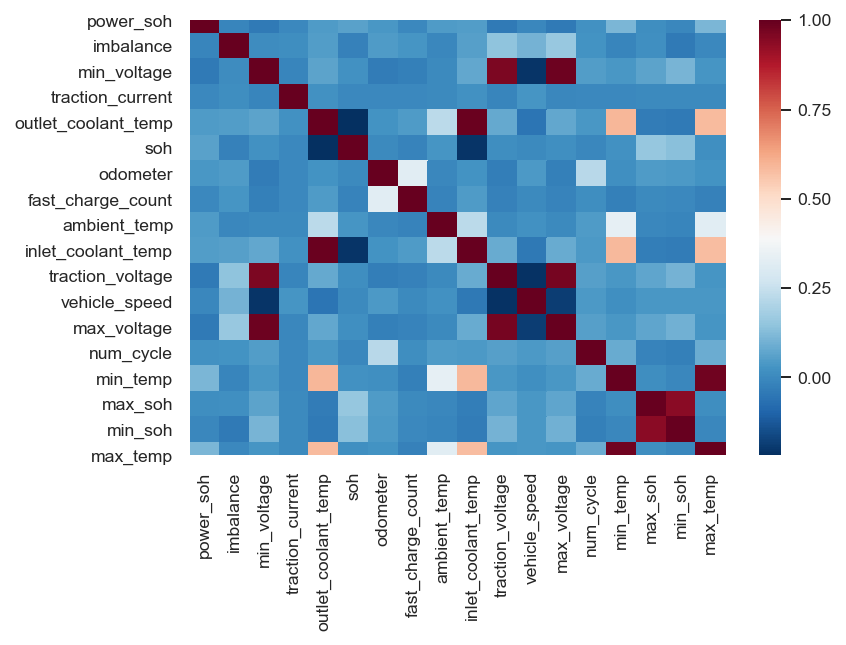

In [3]:
numerical = list(set(['odometer', 'ambient_temp', 'vehicle_speed', 'min_voltage', 'min_temp', 'traction_current', 'max_voltage',
                     'imbalance', 'traction_voltage', 'max_temp', 'inlet_coolant_temp', 'outlet_coolant_temp', 
                      'power_soh','min_soh', 'max_soh', 'soh', 'fast_charge_count', 'num_cycle', 'fast_charge_count']))
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix, cmap="RdBu_r" )
plt.show()

The heatmap shows, that there are very strong correlations. These features duplicate their impact. Only one of these features can be lest to semplify the model. 
Form the heatmap next features have high correlations: 
1. max_temp - min_temp - inlet_coolant_temp - outlet_coolant_temp
2. max_voltage - min_valtage - traction_voltage
3. min_soh - max_soh

Other features have very weak correlations. 

Now let's have a look on the distribution of some features. It was suggester by engineers of the project, that state of health (soh), temperature of the battery, voltage and imbalance can have significant impact on the remaining useful life of the battery. 


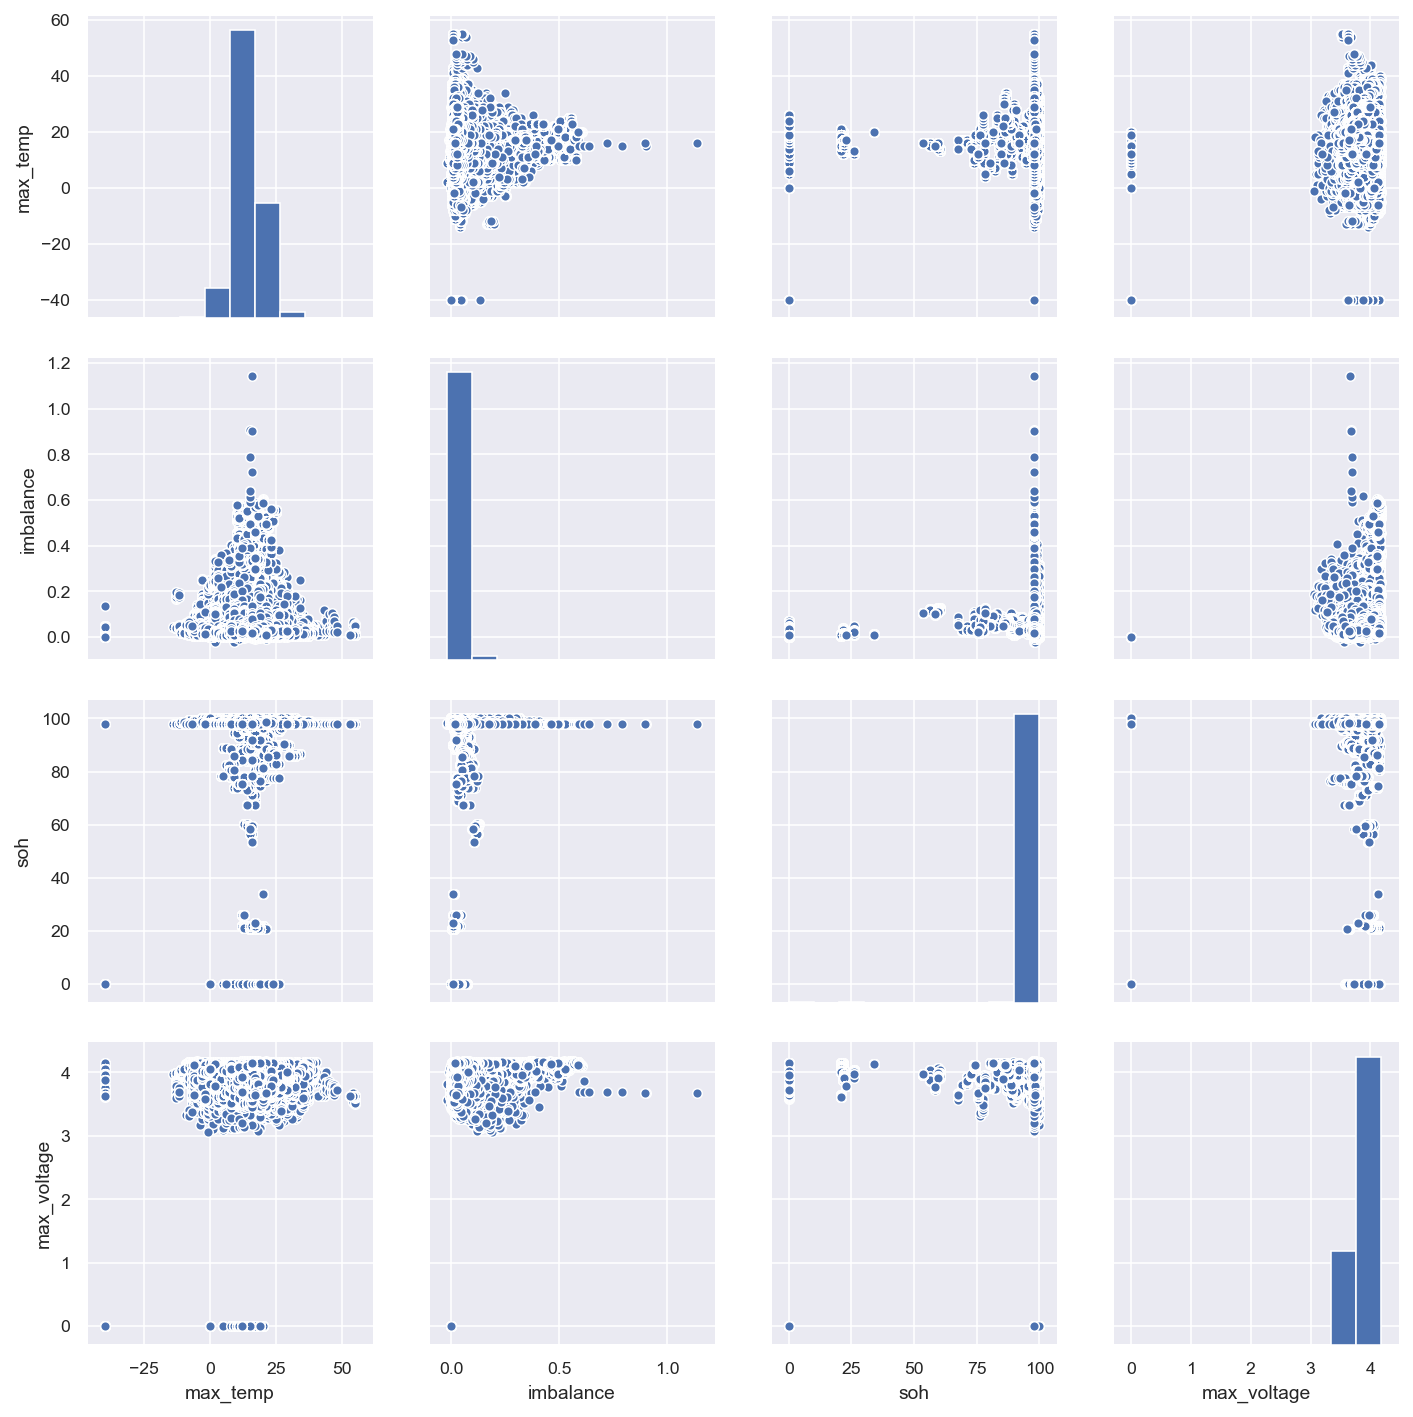

In [13]:
soh_volt_temp = list(set(['soh', 'max_voltage', 'max_temp', 'imbalance']))
sns.pairplot(df[soh_volt_temp])
plt.show()

The diagram above shows, that there are outliers in all features. It also shows that 'imbalance' and 'soh' are skewed.


# Outliers

## SOH 

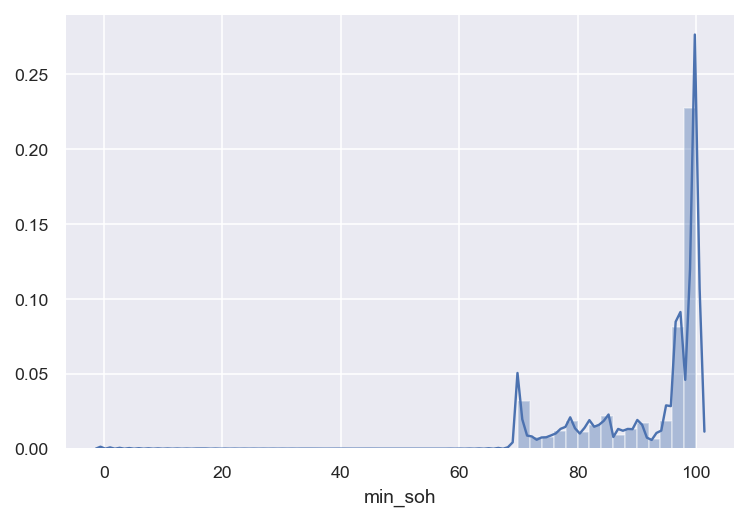

In [2]:
sns.distplot(df['min_soh'])

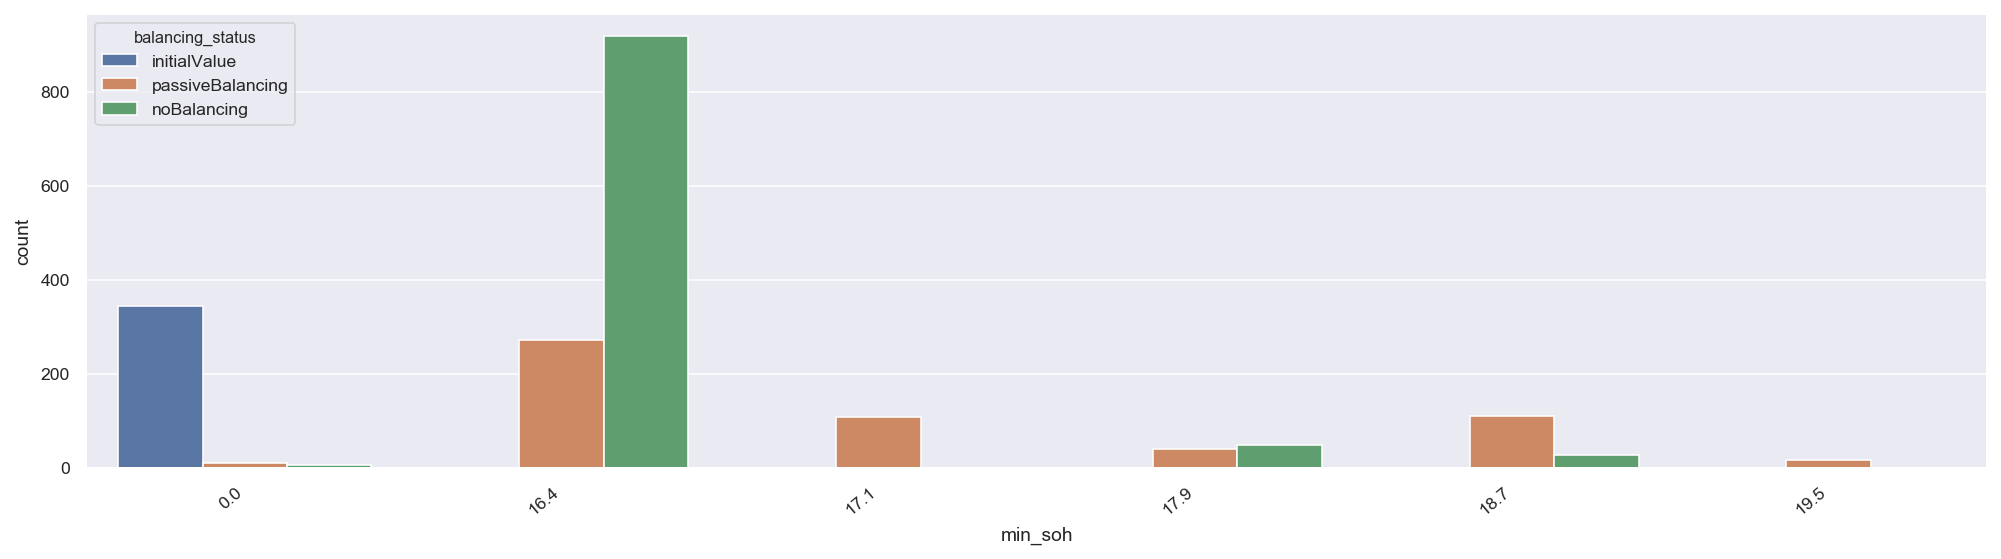

In [3]:
soh_outliers = df[(df['min_soh'] <20)]
plt.figure(figsize=(14,4)) 
ax=sns.countplot(x='min_soh', hue='balancing_status', data=soh_outliers)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

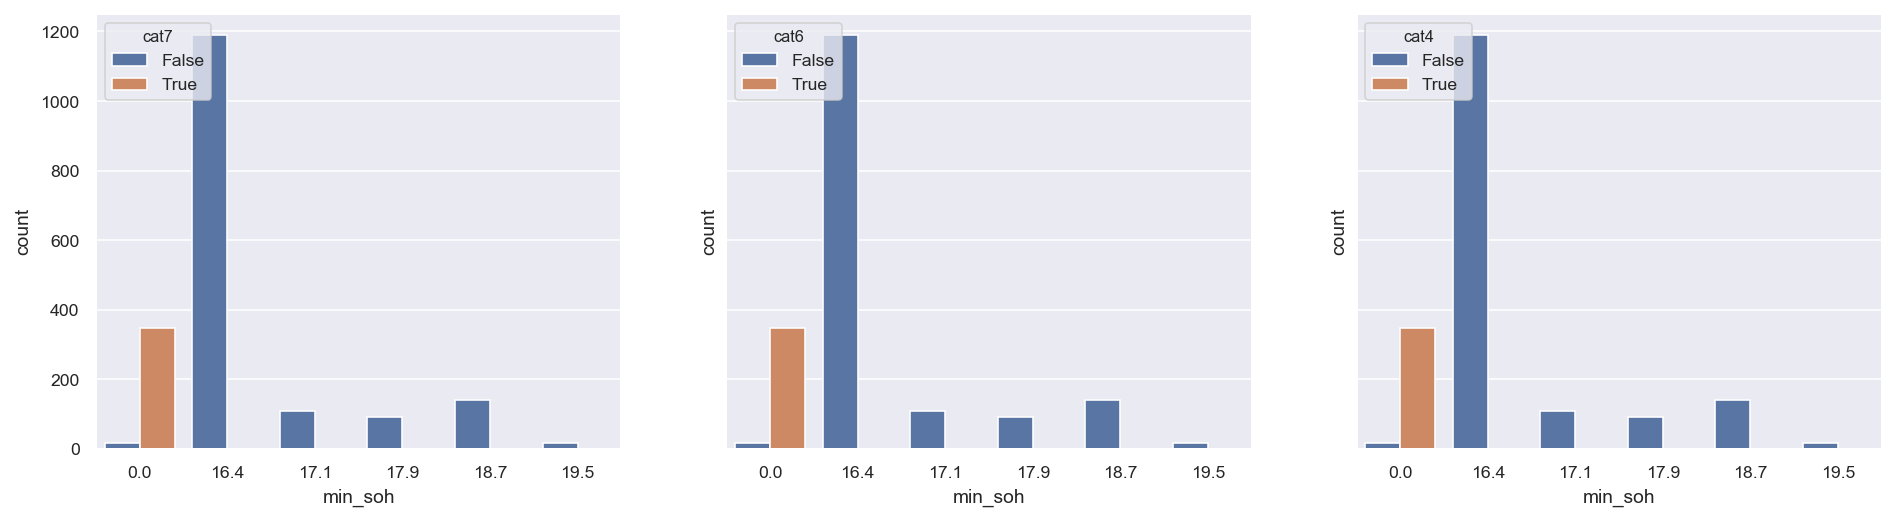

In [4]:
f, axes = plt.subplots(1, 3, figsize=(16, 4), sharey=True)
sns.countplot(x='min_soh', hue = 'cat7', data = soh_outliers, ax = axes[0])
sns.countplot(x='min_soh', hue = 'cat6', data = soh_outliers, ax = axes[1])
sns.countplot(x='min_soh', hue = 'cat4', data = soh_outliers, ax = axes[2])

Most records with soh = 0 have balancing status initial value and all of the cat failure. 

# Imbalance

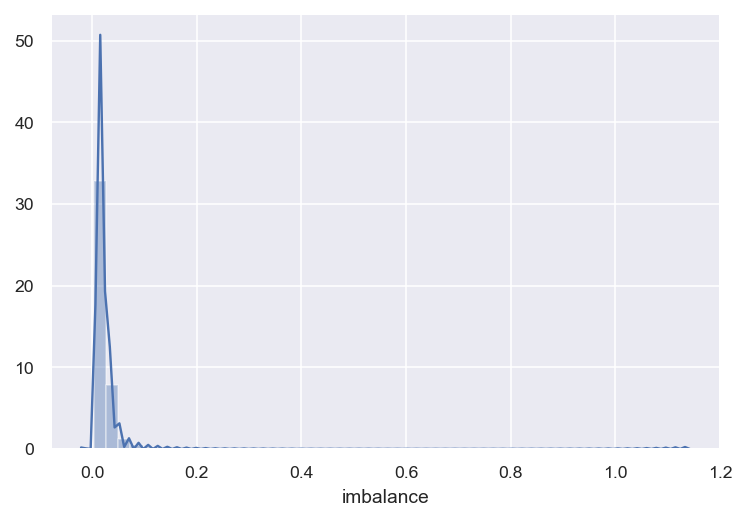

In [5]:
sns.distplot(df['imbalance'])

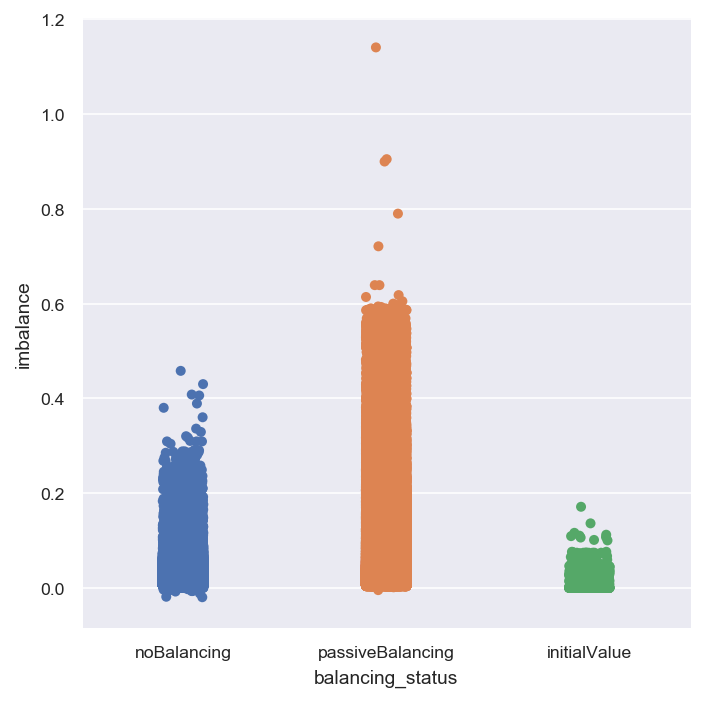

In [6]:
sns.catplot(x='balancing_status', y='imbalance', data=df)
plt.show()

The 'balancing_status' changes from 'noBalancing' to 'passiveBalancing', when imbalance achive a sertan level. After the change of the status the imbalance starts dercreasing. However, there must be rise in passive balancing or gap. 


In [7]:
imb_outliers = df[df['imbalance']>0.62]
imb_outliers.vin

4620473    ecd65a98d6bb6050b5a2ed9498f881c2cf273588c4f477...
4620475    ecd65a98d6bb6050b5a2ed9498f881c2cf273588c4f477...
4620476    ecd65a98d6bb6050b5a2ed9498f881c2cf273588c4f477...
4620477    ecd65a98d6bb6050b5a2ed9498f881c2cf273588c4f477...
4620478    ecd65a98d6bb6050b5a2ed9498f881c2cf273588c4f477...
4620479    ecd65a98d6bb6050b5a2ed9498f881c2cf273588c4f477...
4620480    ecd65a98d6bb6050b5a2ed9498f881c2cf273588c4f477...
Name: vin, dtype: object

All imbalance outliers belong to the same vehicle.

# Cleaning

Features that have insignificant varaty of values were removed. Also features, that correspond to the cell_id (such as max_voltage_cell, min_temp_cell and so on) were removed, because their distribution is close to random. 


In [8]:
cleaned_data = df.drop(columns=['Unnamed: 0', 'vin_prefix', 'recor_id', 'arrival_time', 'mheader_vin', 'mheader_type', 'mheader_time',
                                'message','recorded_time', 'balancing_trigger_cell', 'imbalance_percent', 'min_temp_cell', 
                                'min_voltage_cell', 'max_voltage_cell', 'max_temp_cell', 'fuse_temp', 'emodule_temp', 
                                'cat4', 'cat6', 'cat7', 'cooling_energy_used', 'max_soh_cell', 'power_soh', 
                                'min_soh_cell_id', 'fast_charge','fast_charge_count', 'imbalance_percent'])


In [9]:
cleaned_data.head(3)

,id,vin,actual_time,powermode,odometer,ambient_temp,vehicle_speed,balancing_status,min_voltage,min_temp,traction_current,max_voltage,imbalance,traction_voltage,max_temp,inlet_coolant_temp,thermal_manager_mode,outlet_coolant_temp,min_soh,soh,max_soh,cycle,num_cycle
0,318,0003d9fbded1a6efdacadc35fc270558b3a1cbab0303b2...,2019-03-06 10:27:23.000,keyOut,10619,6.5,0.0,noBalancing,4.107,12.0,0.675,4.153,0.046,445,14.0,240,activeHeating,195,96.0,98.0,97.0,storage,1
1,319,0003d9fbded1a6efdacadc35fc270558b3a1cbab0303b2...,2019-03-07 13:30:10.000,keyOut,9531,4.0,0.0,noBalancing,3.983,6.0,7.375,4.008,0.025,432,7.0,50,idle,55,100.0,98.0,100.0,storage,1
2,320,0003d9fbded1a6efdacadc35fc270558b3a1cbab0303b2...,2019-03-07 13:30:40.000,keyOut,9531,4.0,0.0,noBalancing,3.989,6.0,7.600,4.023,0.034,431,7.0,50,idle,55,100.0,98.0,100.0,storage,1


In [10]:
cleaned_data.drop(cleaned_data[cleaned_data.odometer >  60000].index, inplace=True)

cleaned_data.drop(cleaned_data[cleaned_data.imbalance >  0.62].index, inplace=True)

cleaned_data.drop(cleaned_data[cleaned_data.ambient_temp < -125].index, inplace=True)

cleaned_data.drop(cleaned_data[cleaned_data.min_voltage < 1].index, inplace=True)
cleaned_data.drop(cleaned_data[cleaned_data.max_voltage <1].index, inplace=True)

cleaned_data.drop(cleaned_data[cleaned_data.min_temp < -40].index, inplace=True)
cleaned_data.drop(cleaned_data[cleaned_data.max_temp < -40].index, inplace=True)

cleaned_data.drop(cleaned_data[cleaned_data.traction_current <  -2000000].index, inplace=True)
cleaned_data.drop(cleaned_data[cleaned_data.traction_voltage < 100].index, inplace=True)

cleaned_data.drop(cleaned_data[cleaned_data.inlet_coolant_temp >600].index, inplace=True)
cleaned_data.drop(cleaned_data[cleaned_data.inlet_coolant_temp < -200].index, inplace=True)
cleaned_data.drop(cleaned_data[cleaned_data.outlet_coolant_temp > 800].index, inplace=True)

cleaned_data.drop(cleaned_data[cleaned_data.min_soh < 20].index, inplace=True)
cleaned_data.drop(cleaned_data[cleaned_data.soh < 20].index, inplace=True)
cleaned_data.drop(cleaned_data[cleaned_data.max_soh < 20].index, inplace=True)

cleaned_data.drop(cleaned_data[cleaned_data.balancing_status == 'initialValue'].index, inplace=True)

cleaned_data.drop(cleaned_data[cleaned_data.thermal_manager_mode == 'passingCooling'].index, inplace=True)
cleaned_data.drop(cleaned_data[cleaned_data.thermal_manager_mode == 'thermalBalancing'].index, inplace=True)
cleaned_data.drop(cleaned_data[cleaned_data.thermal_manager_mode == 'initialValue'].index, inplace=True)
cleaned_data.drop(cleaned_data[cleaned_data.thermal_manager_mode == 'activeCooling'].index, inplace=True)

cleaned_data.drop(cleaned_data[cleaned_data.powermode == 'crank3'].index, inplace=True)
cleaned_data.drop(cleaned_data[cleaned_data.powermode == 'ignitionOn2'].index, inplace=True)
cleaned_data.drop(cleaned_data[cleaned_data.powermode == 'accessory1'].index, inplace=True)


In [11]:
cleaned_data.shape

(4816531, 23)

In [12]:
cleaned_data.to_csv('C:/Projects/BatteryLevelAnalysis/data/cleaned_data.csv')